## Water Quality Portal data exploration

In [17]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from IPython.display import display

pd.options.display.max_columns = None
pd.options.display.max_rows = 50

### Looking at California

#### Station data

In [2]:
station = pd.read_csv("station.csv.bz2", 
                      dtype={"HUCEightDigitCode": object}, 
                      low_memory=False)

In [3]:
# Some stations have an incorrect sign on the longitude

station.ix[station.LongitudeMeasure > 0, "Edits"] = "Inverted Longitude"
station.ix[station.LongitudeMeasure > 0, "LongitudeMeasure"] *= -1

In [4]:
station.describe(include="all")

/Users/Sean/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,OrganizationIdentifier,OrganizationFormalName,MonitoringLocationIdentifier,MonitoringLocationName,MonitoringLocationTypeName,MonitoringLocationDescriptionText,HUCEightDigitCode,DrainageAreaMeasure/MeasureValue,DrainageAreaMeasure/MeasureUnitCode,ContributingDrainageAreaMeasure/MeasureValue,ContributingDrainageAreaMeasure/MeasureUnitCode,LatitudeMeasure,LongitudeMeasure,SourceMapScaleNumeric,HorizontalAccuracyMeasure/MeasureValue,HorizontalAccuracyMeasure/MeasureUnitCode,HorizontalCollectionMethodName,HorizontalCoordinateReferenceSystemDatumName,VerticalMeasure/MeasureValue,VerticalMeasure/MeasureUnitCode,VerticalAccuracyMeasure/MeasureValue,VerticalAccuracyMeasure/MeasureUnitCode,VerticalCollectionMethodName,VerticalCoordinateReferenceSystemDatumName,CountryCode,StateCode,CountyCode,AquiferName,FormationTypeText,AquiferTypeName,ConstructionDateText,WellDepthMeasure/MeasureValue,WellDepthMeasure/MeasureUnitCode,WellHoleDepthMeasure/MeasureValue,WellHoleDepthMeasure/MeasureUnitCode,ProviderName,Edits
count,133823,133823,133823,133515,133823,14261,122958,2946.000000,2946,14.000000,14,133823.000000,133823.000000,5.550100e+04,110571,110571,133823,133823,91298.000000,91301,74425.000000,74425,84403,91301,133823,133823.0,133384.000000,71888,6220,3161,4.206900e+04,55002.000000,55002,33517.000000,33517,133823,138
unique,90,82,133747,128216,75,8067,167,NaN,1,NaN,1,NaN,NaN,NaN,9,5,24,6,NaN,5,NaN,1,13,5,1,NaN,NaN,7,64,5,NaN,NaN,1,NaN,1,3,1
top,USGS-CA,USGS California Water Science Center,USGS-11261100,Not assigned,Well,WDIS Historic Station,18030012,NaN,sq mi,NaN,sq mi,NaN,NaN,NaN,1,seconds,Interpolated from map,NAD83,NaN,feet,NaN,feet,Interpolated from topographic map,NGVD29,US,NaN,NaN,Central Valley aquifer system,Holocene Alluvium,Unconfined single aquifer,NaN,NaN,ft,NaN,ft,NWIS,Inverted Longitude
freq,81477,81477,2,1040,77634,541,15166,NaN,2946,NaN,14,NaN,NaN,NaN,77215,69950,70478,123139,NaN,74425,NaN,74425,62703,72704,133823,NaN,NaN,27502,2192,2793,NaN,NaN,55002,NaN,33517,86006,138
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1262.820034,NaN,104285.645000,NaN,36.061267,-119.243799,3.031110e+04,NaN,NaN,NaN,NaN,992.120225,NaN,13.050716,NaN,NaN,NaN,NaN,6.0,59.265999,NaN,NaN,NaN,1.706741e+07,323.855276,NaN,336.788679,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13114.310067,NaN,93020.860422,NaN,2.494609,4.419339,2.175894e+04,NaN,NaN,NaN,NaN,1425.521780,NaN,15.732259,NaN,NaN,NaN,NaN,0.0,29.001564,NaN,NaN,NaN,6.609715e+06,414.656239,NaN,373.926948,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010000,NaN,38.900000,NaN,-1.000000,-177.040700,0.000000e+00,NaN,NaN,NaN,NaN,-550.000000,NaN,0.010000,NaN,NaN,NaN,NaN,6.0,1.000000,NaN,NaN,NaN,1.860000e+03,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.275700,-121.116603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.735232,-119.509444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.667799,-117.614891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# station.to_csv('station-clean.csv.bz2', compression='bz2')

## Plotting station locations

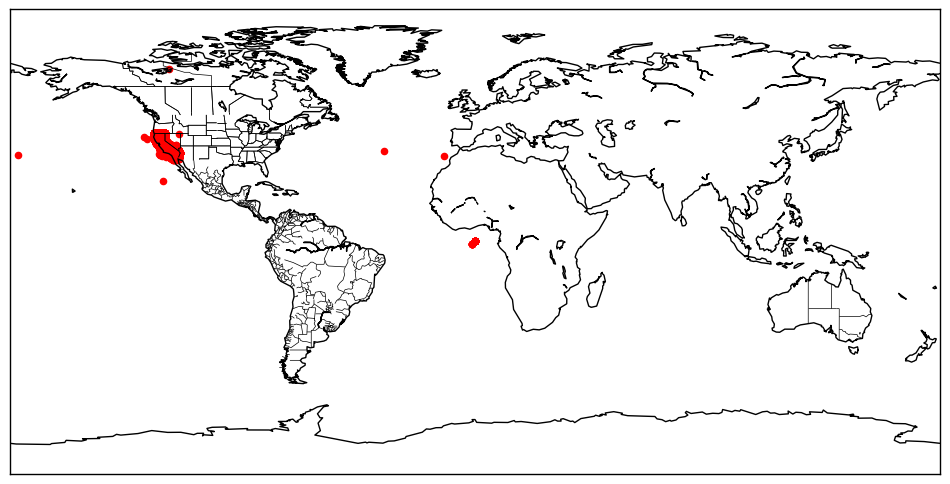

In [6]:
fig = plt.figure(figsize=(12,12))
m=Basemap()
m.drawcoastlines()
m.drawstates()

x, y = m(station.LongitudeMeasure.values, station.LatitudeMeasure.values)
m.scatter(x, y, color='red')

## Examining results

In [7]:
results = pd.read_csv("result-sample-5%.csv.bz2", 
                      error_bad_lines=False, 
                      low_memory=False, 
                      dtype={'CharacteristicName': object})

b'Skipping line 16712: expected 63 fields, saw 85\nSkipping line 294564: expected 63 fields, saw 64\n'


In [8]:
results["NumericResult"] = \
    pd.to_numeric(results.ResultMeasureValue, errors='coerce')

results.describe(include='all')

/Users/Sean/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,ActivityTypeCode,ActivityMediaName,ActivityMediaSubdivisionName,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,ActivityEndDate,ActivityEndTime/Time,ActivityEndTime/TimeZoneCode,ActivityDepthHeightMeasure/MeasureValue,ActivityDepthHeightMeasure/MeasureUnitCode,ActivityDepthAltitudeReferencePointText,ActivityTopDepthHeightMeasure/MeasureValue,ActivityTopDepthHeightMeasure/MeasureUnitCode,ActivityBottomDepthHeightMeasure/MeasureValue,ActivityBottomDepthHeightMeasure/MeasureUnitCode,ProjectIdentifier,ActivityConductingOrganizationText,MonitoringLocationIdentifier,ActivityCommentText,SampleAquifer,HydrologicCondition,HydrologicEvent,SampleCollectionMethod/MethodIdentifier,SampleCollectionMethod/MethodIdentifierContext,SampleCollectionMethod/MethodName,SampleCollectionEquipmentName,ResultDetectionConditionText,CharacteristicName,ResultSampleFractionText,ResultMeasureValue,ResultMeasure/MeasureUnitCode,MeasureQualifierCode,ResultStatusIdentifier,StatisticalBaseCode,ResultValueTypeName,ResultWeightBasisText,ResultTimeBasisText,ResultTemperatureBasisText,ResultParticleSizeBasisText,PrecisionValue,ResultCommentText,USGSPCode,ResultDepthHeightMeasure/MeasureValue,ResultDepthHeightMeasure/MeasureUnitCode,ResultDepthAltitudeReferencePointText,SubjectTaxonomicName,SampleTissueAnatomyName,ResultAnalyticalMethod/MethodIdentifier,ResultAnalyticalMethod/MethodIdentifierContext,ResultAnalyticalMethod/MethodName,MethodDescriptionText,LaboratoryName,AnalysisStartDate,ResultLaboratoryCommentText,DetectionQuantitationLimitTypeName,DetectionQuantitationLimitMeasure/MeasureValue,DetectionQuantitationLimitMeasure/MeasureUnitCode,PreparationStartDate,ProviderName,NumericResult
count,673879,673839,673805,673815,673667,279977,673851,625692,579659,10266,5414,5400,261762,261755,44730,13112,13095,8005,8004,430767,195008,673801,121999,13476,272812,272809,673784,673785,673786,673781,82275,673812,399323,591654,588724,2672,503043,86848,672860,126887,83840,93783,11520,1886,201170,272792,38345,38344,1289,34155,3932,383179,383179,294408,166990,137139,138738,15012,96288,104392,104488,19133,673767,5.860800e+05
unique,126,83,312472,38,17,27,21171,2341,11,2023,552,14,1798,8,12,721,6,792,6,1237,64,31987,23509,67,19,29,255,129,228,128,47,1552,31,42782,184,14,10,17,6,10,12,11,110,212,69442,1700,62,3,3,2031,12,1355,40,1064,315,224,5994,110,39,1248,78,2137,3,NaN
top,USGS-CA,USGS California Water Science Center,21CAOCSD_WQX-2010.2-WQ-Rep1-BeamC,Sample-Routine,Water,Surface Water,2010-04-07,00:00:00,PST,2009-01-20,12:00:59,PDT,1,m,WATER SURFACE,100,feet,1,feet,PRJ-005,U.S. Geological Survey-Water Resources Discipline,21CAOCSD_WQX-2103,Two different ocean monitoring vessels are use...,Quaternary Alluvium,Not determined,Routine sample,USGS,USGS,USGS,Unknown,Not Detected,"Temperature, water",Dissolved,0,mg/l,D,Final,,Actual,,,,< 0.0625 mm,,Bacterial count falls outside the permissible ...,00010,0.1,m,Depth below water surface,Ceriodaphnia dubia,Mixed Parts,WQ,USGS,Water Quality,"NWIS User's Manual, QW System, Appendix",DWR Bryte Laboratory,1950-01-01,value is highly variable by this method. see r...,Laboratory Reporting Level,1,ug/l,2006-07-24,STORET,NaN
freq,263264,263264,645,435603,619598,145003,6145,72502,408869,169,150,2882,97887,218970,20790,250,13003,320,7900,77940,143413,71648,5033,4570,135615,213565,201404,201404,201395,294640,68563,50358,176208,21075,126586,1431,183490,78324,495792,77026,78409,78409,1851,1277,2577,9187,30759,35800,1285,2608,1004,73694,137472,55875,37159,34889,6372,4736,37130,6529,61315,56,398347,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.974050e+02
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [9]:
print(results.ActivityMediaName.unique())

['Biological' 'Water' 'Habitat' 'Tissue' 'Air' 'Sediment' 'Other' 'BMI_RWB'
 'Habitat_SWAMP' nan 'USEPA' 'Water_Grab' 'Soil' 'Biological Tissue' 'mm'
 'Backpack-P1&2' 'USGS' 'deg C']


In [10]:
print(results.ActivityMediaSubdivisionName.unique())

[nan 'CEDEN' 'USEPA' 'Waste Water' 'Surface Soil' 'Water' 'Surface Water'
 'Ambient Air' 'Other' 'Bottom material' 'Groundwater' 'Wet Fall Material'
 'Leachate' 'Bulk deposition' 'Dry Fall Material' 'Artificial' 'Suspended'
 'Core material' 'Sludge' 'Interstitial' 'Soil moisture' 'Hyporheic zone'
 'Elutriation' 'Finished Water' 'Effluent' 'Landfill effluent'
 'NAWQA Fish  Backpack-P1&2' 'USGS']


In [22]:
results.CharacteristicName.value_counts().head(200)

Temperature, water                                       50358
Specific conductance                                     37540
pH                                                       31956
Dissolved oxygen (DO)                                    19501
Count                                                    18684
Light, transmissivity                                    18563
Total dissolved solids                                   16944
Salinity                                                 16845
Density                                                  14606
Light, photosynthetic active radiation at depth (PAR)    12217
Light attenuation coefficient                            11793
Depth                                                     9455
Sediment                                                  8928
Nitrate                                                   8592
Chlorophyll a                                             8556
Chloride                                               

In [40]:
topMeasures = results.CharacteristicName.value_counts().index 

stats = []  
for measure in topMeasures:
    rows = results.ix[results.CharacteristicName == measure]
    rows = rows[np.isfinite(rows.NumericResult)]
    tally = len(rows)
    
    units = rows["ResultMeasure/MeasureUnitCode"].unique()
    
    min = rows.NumericResult.min()
    max = rows.NumericResult.max()
    mean = rows.NumericResult.mean()
    stddev = rows.NumericResult.std()
    
    quantiles = rows.NumericResult.quantile([.25, .5, .75])

    stats.append({
            'Measure': measure, 
            'NumValues': tally, 
            'Units': units,
            'Minimum': min, 
            '25%': quantiles[.25],
            '50%': quantiles[.5],
            '75%': quantiles[.75],
            'Maximum': max,
            'Mean': mean,
            'StdDev': stddev
        })
    
stats = pd.DataFrame(stats, 
                     columns=['Measure', 'NumValues', 'Units', 
                              'Minimum', '25%', '50%', '75%', 'Maximum', 
                              'Mean', 'StdDev'])
stats.sort('Measure').to_csv('measures.csv', index=False, sep='\t')

/Users/Sean/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:35: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [13]:
results[results["ResultMeasure/MeasureUnitCode"] == 'Deg']\
    [results.CharacteristicName == 'Temperature, water']\
    [np.isfinite(results.NumericResult)]


/Users/Sean/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,ActivityTypeCode,ActivityMediaName,ActivityMediaSubdivisionName,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,ActivityEndDate,ActivityEndTime/Time,ActivityEndTime/TimeZoneCode,ActivityDepthHeightMeasure/MeasureValue,ActivityDepthHeightMeasure/MeasureUnitCode,ActivityDepthAltitudeReferencePointText,ActivityTopDepthHeightMeasure/MeasureValue,ActivityTopDepthHeightMeasure/MeasureUnitCode,ActivityBottomDepthHeightMeasure/MeasureValue,ActivityBottomDepthHeightMeasure/MeasureUnitCode,ProjectIdentifier,ActivityConductingOrganizationText,MonitoringLocationIdentifier,ActivityCommentText,SampleAquifer,HydrologicCondition,HydrologicEvent,SampleCollectionMethod/MethodIdentifier,SampleCollectionMethod/MethodIdentifierContext,SampleCollectionMethod/MethodName,SampleCollectionEquipmentName,ResultDetectionConditionText,CharacteristicName,ResultSampleFractionText,ResultMeasureValue,ResultMeasure/MeasureUnitCode,MeasureQualifierCode,ResultStatusIdentifier,StatisticalBaseCode,ResultValueTypeName,ResultWeightBasisText,ResultTimeBasisText,ResultTemperatureBasisText,ResultParticleSizeBasisText,PrecisionValue,ResultCommentText,USGSPCode,ResultDepthHeightMeasure/MeasureValue,ResultDepthHeightMeasure/MeasureUnitCode,ResultDepthAltitudeReferencePointText,SubjectTaxonomicName,SampleTissueAnatomyName,ResultAnalyticalMethod/MethodIdentifier,ResultAnalyticalMethod/MethodIdentifierContext,ResultAnalyticalMethod/MethodName,MethodDescriptionText,LaboratoryName,AnalysisStartDate,ResultLaboratoryCommentText,DetectionQuantitationLimitTypeName,DetectionQuantitationLimitMeasure/MeasureValue,DetectionQuantitationLimitMeasure/MeasureUnitCode,PreparationStartDate,ProviderName,NumericResult
206531,ROBINSONRANCHERIAENVIRONMENTAL,Robinson Rancheria Environmental Center,ROBINSONRANCHERIAENVIRONMENTAL-2/9/12,Field Msr/Obs,Water,NaN,2012-02-09,10:40:00,PDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MSWQM,NaN,ROBINSONRANCHERIAENVIRONMENTAL-RSW-01,NaN,NaN,NaN,NaN,USEPA,USEPA,USEPA,Unknown,NaN,"Temperature, water",NaN,9.5,Deg,NaN,Final,NaN,Actual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,ROBINSONRANCHERIAENVIRONMENTAL,Unknown Method or Procedure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET,9.5


In [14]:
results[results["ResultMeasure/MeasureUnitCode"] == 'mg/l']\
    [results.CharacteristicName == 'Temperature, water']\
    [np.isfinite(results.NumericResult)]


/Users/Sean/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,ActivityTypeCode,ActivityMediaName,ActivityMediaSubdivisionName,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,ActivityEndDate,ActivityEndTime/Time,ActivityEndTime/TimeZoneCode,ActivityDepthHeightMeasure/MeasureValue,ActivityDepthHeightMeasure/MeasureUnitCode,ActivityDepthAltitudeReferencePointText,ActivityTopDepthHeightMeasure/MeasureValue,ActivityTopDepthHeightMeasure/MeasureUnitCode,ActivityBottomDepthHeightMeasure/MeasureValue,ActivityBottomDepthHeightMeasure/MeasureUnitCode,ProjectIdentifier,ActivityConductingOrganizationText,MonitoringLocationIdentifier,ActivityCommentText,SampleAquifer,HydrologicCondition,HydrologicEvent,SampleCollectionMethod/MethodIdentifier,SampleCollectionMethod/MethodIdentifierContext,SampleCollectionMethod/MethodName,SampleCollectionEquipmentName,ResultDetectionConditionText,CharacteristicName,ResultSampleFractionText,ResultMeasureValue,ResultMeasure/MeasureUnitCode,MeasureQualifierCode,ResultStatusIdentifier,StatisticalBaseCode,ResultValueTypeName,ResultWeightBasisText,ResultTimeBasisText,ResultTemperatureBasisText,ResultParticleSizeBasisText,PrecisionValue,ResultCommentText,USGSPCode,ResultDepthHeightMeasure/MeasureValue,ResultDepthHeightMeasure/MeasureUnitCode,ResultDepthAltitudeReferencePointText,SubjectTaxonomicName,SampleTissueAnatomyName,ResultAnalyticalMethod/MethodIdentifier,ResultAnalyticalMethod/MethodIdentifierContext,ResultAnalyticalMethod/MethodName,MethodDescriptionText,LaboratoryName,AnalysisStartDate,ResultLaboratoryCommentText,DetectionQuantitationLimitTypeName,DetectionQuantitationLimitMeasure/MeasureValue,DetectionQuantitationLimitMeasure/MeasureUnitCode,PreparationStartDate,ProviderName,NumericResult
318589,TABLEMOUNTAINRANCHERIA_WQX,Table Mountain Rancheria,TABLEMOUNTAINRANCHERIA_WQX-BSW1: 20150318: A5C...,Sample-Routine,Water,NaN,2015-03-05,00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WQ STUDY,NaN,TABLEMOUNTAINRANCHERIA_WQX-BSW1,NaN,NaN,NaN,NaN,Laboratory Grab,TABLEMOUNTAINRANCHERIA_WQX,Laboratory Grab Sample,Water Bottle,NaN,"Temperature, water",NaN,22.7,mg/l,NaN,Final,NaN,Actual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4500-H+B,APHA,"pH in Water by Potentiometry, pH Value in Wate...",https://www.nemi.gov/methods/method_summary/4707/,NaN,NaN,NaN,Instrument Detection Level,22.7,mg/l,NaN,STORET,22.7


In [20]:
temps = results[results.CharacteristicName == 'Temperature, water']
temps = pd.DataFrame({"Name": temps.CharacteristicName, 
                      "Result": temps.NumericResult, 
                      "Unit": temps["ResultMeasure/MeasureUnitCode"]})

In [21]:
import json
from pint import UnitRegistry
from collections import namedtuple

Units = namedtuple('Units', ['preferred', 'allowed'])

with open('measures.json') as jsonfile:
    measures = {m['measure']:Units(m['units'][0], set(m['units']))
                for m in json.load(jsonfile)}
    
ureg = UnitRegistry('units.reg')
Q_ = ureg.Quantity

# A lot of unit descriptions in the data contain spaces (e.g., "deg F"),
# or variable casing, or leading or trailing spaces. This tries to
# convert them all to a normalized format that will play nicely with Pint.
def cleanUnit(name):
    return str(name).lower().strip().replace(' ', '_')

# Checks to see if a unit is in the list of approved units for the measure
# type, as defined in measures.json. If it is, returns the preferred
# unit that the data should be converted to, which is the first listed unit
# in measures.json.
def getTargetUnit(measure, unit):
    unitsForMeasure = measures[measure]
    if unitsForMeasure is None:
        return None

    if not unit in unitsForMeasure.allowed:
        return None

    return unitsForMeasure.preferred

# Normalizes a measurement to the preferred (or "base") unit. 
# If it's in a unit that's not pre-cleared for the data type, it
# replaces it with NaN.
def convertToBaseUnit(measure, unit, value):
    unit = cleanUnit(unit)
    targetUnit = getTargetUnit(measure, unit)
    if targetUnit is None:
        return np.nan
    
    original = Q_(value, ureg(unit))
    return original.to(ureg(targetUnit))

temps['CleanResult'] = temps.apply(lambda row: convertToBaseUnit(row.Name, row.Unit, row.Result), axis=1)

temps

,Name,Result,Unit,CleanResult
12,"Temperature, water",19.364783,deg C,19.36478261 degC
23,"Temperature, water",16.348750,deg C,16.34875 degC
37,"Temperature, water",26.500000,deg C,26.5 degC
40,"Temperature, water",24.500000,deg C,24.5 degC
41,"Temperature, water",20.600000,deg C,20.6 degC
45,"Temperature, water",7.980000,deg C,7.98 degC
50,"Temperature, water",20.443542,deg C,20.44354167 degC
65,"Temperature, water",23.000000,deg C,23.0 degC
68,"Temperature, water",22.700000,deg C,22.7 degC
99,"Temperature, water",23.700000,deg C,23.7 degC


In [35]:
results[results.CharacteristicName == "Acetaminophen"]

,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,ActivityTypeCode,ActivityMediaName,ActivityMediaSubdivisionName,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,ActivityEndDate,ActivityEndTime/Time,ActivityEndTime/TimeZoneCode,ActivityDepthHeightMeasure/MeasureValue,ActivityDepthHeightMeasure/MeasureUnitCode,ActivityDepthAltitudeReferencePointText,ActivityTopDepthHeightMeasure/MeasureValue,ActivityTopDepthHeightMeasure/MeasureUnitCode,ActivityBottomDepthHeightMeasure/MeasureValue,ActivityBottomDepthHeightMeasure/MeasureUnitCode,ProjectIdentifier,ActivityConductingOrganizationText,MonitoringLocationIdentifier,ActivityCommentText,SampleAquifer,HydrologicCondition,HydrologicEvent,SampleCollectionMethod/MethodIdentifier,SampleCollectionMethod/MethodIdentifierContext,SampleCollectionMethod/MethodName,SampleCollectionEquipmentName,ResultDetectionConditionText,CharacteristicName,ResultSampleFractionText,ResultMeasureValue,ResultMeasure/MeasureUnitCode,MeasureQualifierCode,ResultStatusIdentifier,StatisticalBaseCode,ResultValueTypeName,ResultWeightBasisText,ResultTimeBasisText,ResultTemperatureBasisText,ResultParticleSizeBasisText,PrecisionValue,ResultCommentText,USGSPCode,ResultDepthHeightMeasure/MeasureValue,ResultDepthHeightMeasure/MeasureUnitCode,ResultDepthAltitudeReferencePointText,SubjectTaxonomicName,SampleTissueAnatomyName,ResultAnalyticalMethod/MethodIdentifier,ResultAnalyticalMethod/MethodIdentifierContext,ResultAnalyticalMethod/MethodName,MethodDescriptionText,LaboratoryName,AnalysisStartDate,ResultLaboratoryCommentText,DetectionQuantitationLimitTypeName,DetectionQuantitationLimitMeasure/MeasureValue,DetectionQuantitationLimitMeasure/MeasureUnitCode,PreparationStartDate,ProviderName,NumericResult
41454,11NPSWRD_WQX,National Park Service Water Resources Division,11NPSWRD_WQX-A099B4B029784071A87E2E60EAFBC82B001,Quality Control Sample-Field Blank,Water,NaN,2013-11-12,12:53:00,PST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NPS_3P,NaN,11NPSWRD_WQX-YOSE_3P_HI,Organization ActivityID=YOSE_3P_HI-201311121253FB,NaN,NaN,NaN,3P_FDBLANK,11NPSWRD_WQX,EPA/NPS-EC Field Blank Sampling,Water Bottle,Not Detected,Acetaminophen,Dissolved,NaN,NaN,NaN,Final,NaN,Estimated,NaN,NaN,NaN,NaN,NaN,The sample was analyzed outside of holding tim...,NaN,NaN,NaN,NaN,NaN,NaN,EPA8NPS_NPS_3P_1694P,11NPSWRD_WQX,EPA/NPS-EC PPCPs in Water by Liquid Chromatogr...,NaN,U.S. Environmental Protection Agency Region 8 ...,2013-11-23,Sample received hot,Method Detection Level,10,ng/l,NaN,STORET,NaN
188237,11NPSWRD_WQX,National Park Service Water Resources Division,11NPSWRD_WQX-2FD914CD3B4A41D18FD60A2CD254C708001,Sample-Routine,Water,NaN,2014-07-09,12:52:00,PDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NPS_3P,NaN,11NPSWRD_WQX-SEQU_3P_EMERALD,Organization ActivityID=SEQU_3P_EMERALD-201407...,NaN,NaN,NaN,3P_WSAMPLE,11NPSWRD_WQX,"EPA/NPS-EC Sampling for Pesticides, PPCPs & Wa...",Water Bottle,Not Detected,Acetaminophen,Dissolved,NaN,NaN,NaN,Final,NaN,Actual,NaN,NaN,NaN,NaN,NaN,The lab number was 1407017-15 and the batch nu...,NaN,NaN,NaN,NaN,NaN,NaN,EPA8NPS_NPS_3P_1694P,11NPSWRD_WQX,EPA/NPS-EC PPCPs in Water by Liquid Chromatogr...,NaN,U.S. Environmental Protection Agency Region 8 ...,2014-07-12,NaN,Method Detection Level,10,ng/l,NaN,STORET,NaN
226492,11NPSWRD_WQX,National Park Service Water Resources Division,11NPSWRD_WQX-7A706A15B5DF466BBFD00FEC9E27BB2C001,Sample-Routine,Water,NaN,2014-07-14,10:02:00,PDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NPS_3P,NaN,11NPSWRD_WQX-SEQU_3P_LDEERCR,Organization ActivityID=SEQU_3P_LDEERCR-201407...,NaN,NaN,NaN,3P_WSAMPLE,11NPSWRD_WQX,"EPA/NPS-EC Sampling for Pesticides, PPCPs & Wa...",Water Bottle,Not Detected,Acetaminophen,Dissolved,NaN,NaN,NaN,Final,NaN,Estimated,NaN,NaN,NaN,NaN,NaN,Lab personnel noted the sample was analyzed ou...,NaN,NaN,NaN,NaN,NaN,NaN,EPA8NPS_NPS_3P_1694P,11NPSWRD_WQX,EPA/NPS-EC PPCPs in Water by Liquid Chromatogr...,NaN,U.S. Environmental Protection Agency Region 8 ...,2014-07-21